## Central Limit Theorem

Reproduce the pop1 and pop2 populations and samples, using numpy's binomial function. Specifically, create two binomially distributed populations with n equal to 10 and size equal to 10000. The p-value of pop1 should be 0.2 and the p-value of pop2 should be 0.5. Using a sample size of 100, calculate the means and standard deviations of your samples.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

__Note:__ A parameter of alpha < 1.0 allows for transparency making it possible to graph more than one histogram at a time.

### Create two populations and display their distributions.

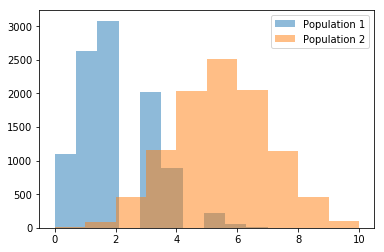

In [6]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha= .5, label='Population 1') 
plt.hist(pop2, alpha= .5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

It seems to me that the "gap" in population1 is an anomoly of the number of bins chosen for the histogram, but clearly it is more skewed than the other population.  Testing this with other choices for number of bins.

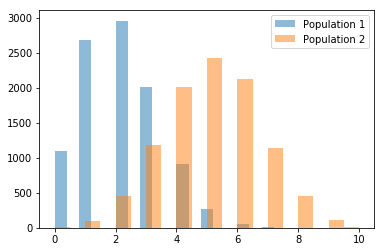

In [3]:
plt.hist(pop1, alpha=0.5, label='Population 1', bins=20) 
plt.hist(pop2, alpha=0.5, label='Population 2', bins=20) 
plt.legend(loc='upper right') 
plt.show()

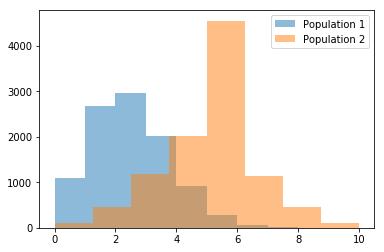

In [4]:
plt.hist(pop1, alpha=0.5, label='Population 1', bins=8) 
plt.hist(pop2, alpha=0.5, label='Population 2', bins=8) 
plt.legend(loc='upper right') 
plt.show()

Conclusion: Binomial distribution, with a fairly small n of 10, has a limited number of discrete possibilities, so "gaps" can easily be in evidence in histograms.  To completely remove the possibility of "gaps" which aren't there, we can provide the bins as a list.  While this might seem to be overkill, it does prevent misconceptions like in the graph above where pop2 appears to have a significant "spike" in middle values when 2 values landed in one bin.

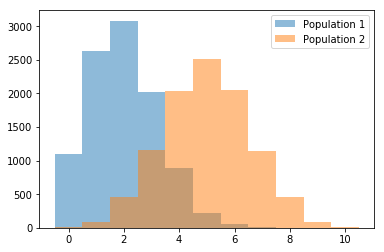

In [8]:
plt.hist(pop1, alpha=0.5, label='Population 1', bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]) 
plt.hist(pop2, alpha=0.5, label='Population 2', bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]) 
plt.legend(loc='upper right') 
plt.show()

### Take samples of each population with n=100

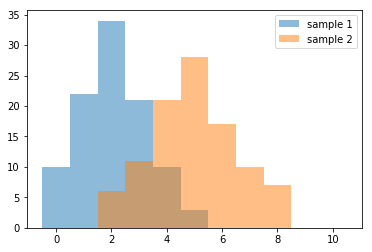

In [10]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1', bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]) 
plt.hist(sample2, alpha=0.5, label='sample 2', bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]) 
plt.legend(loc='upper right') 
plt.show()

Given such a large sample (n=100) I'm not surprised to see that the distribution of the samples are fairly close to that of the populations. Sample 1 has fewer results of '1' than I expected and Sample 2 is missing those extreme tail values which should show up every once in a while.  Still, it's reasonably close.

#### Calculate sample means and stdev

In [14]:
print('The mean of the first sample is {}.'.format(sample1.mean()))
print('The mean of the second sample is {}.'.format(sample2.mean()))
print('The stdev of the first sample is {}.'.format(sample1.std()))
print('The stdev of the second sample is {}.'.format(sample2.std()))

# Compute the difference between the two sample means.
diff=sample2.mean( ) - sample1.mean()
print('The difference of the sample means is {}.'.format(diff))

The mean of the first sample is 2.08.
The mean of the second sample is 4.97.
The stdev of the first sample is 1.222129289396175.
The stdev of the second sample is 1.5456713751635567.
The difference of the sample means is 2.8899999999999997.


These values are very close to what was expected from the population: <br>
Expected mean of population 1 is (10)(.2)=2.0  <br>
Expected stdev is sqrt(n p q) or sqrt( 10*.2*.8) = sqrt(1.6) = 1.26<br>
Expected mean of population 2 is (10)(.5)=5.0 <br>
Expected stdev is sqrt( 10*.5*.5) = sqrt(2.5) = 1.58<br>
Expected difference of sample means was 3.0

#### Calculate stErr of difference of means
Calculate the standard error of the sampling distribution of the difference of the means. First, create an array with the size of each variable and another with the standard deviation of each variable. 

__Note__ Is seems that it should be more straightforward to calculate the stErr of sample distribution, are we doing "extra" to reinforce the formula?

In [16]:
size = np.array([100, 100])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5 
print('The standard error of the difference in sampled means is {}.'.format(diff_se))

#The difference between the means divided by the standard error: T-value.  
print('The T-value for the observed difference is {}.'.format(diff/diff_se))

The standard error of the difference in sampled means is 0.19704567998309427.
The T-value for the observed difference is 14.66664988670622.


OK, so here is how to run a t-test for difference of means straight from the built-in stats package.  As we see, the t-value is extremely close to what we just calculated and the probability of having a t-value this large _assuming no difference in populations_ is dang near impossible.  Thus we are extremely convinced that there IS as difference.

In [17]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=14.59313238171392, pvalue=9.530203625937585e-33)


## 1. Repeat above work with n=1000
Predictions: <br>
1. &ensp; I would expect there to be more accuracy, but not a significant change to the difference in sampled means.
2. &ensp; The stErr for the sampled difference of means will decrease because n has increased.
3. &ensp; As the t-value is inversely proportional to stErr, it will go up and thus the p-value will go up.

In [18]:
sample3 = np.random.choice(pop1, 1000, replace=True)
sample4 = np.random.choice(pop2, 1000, replace=True)
print('The mean of the first sample is {}.'.format(sample3.mean()))
print('The mean of the second sample is {}.'.format(sample4.mean()))
print('The stdev of the first sample is {}.'.format(sample3.std()))
print('The stdev of the second sample is {}.'.format(sample4.std()))

# Compute the difference between the two sample means.
diff2=sample4.mean( ) - sample3.mean()
print('The difference of the sample means is {}.'.format(diff2))

The mean of the first sample is 2.022.
The mean of the second sample is 4.986.
The stdev of the first sample is 1.2294372696481917.
The stdev of the second sample is 1.6074215377429781.
The difference of the sample means is 2.964.


In [19]:
from scipy.stats import ttest_ind
print(ttest_ind(sample4, sample3, equal_var=False))

Ttest_indResult(statistic=46.293180813214256, pvalue=2.155973621704e-312)


## 2. Change p for the first population to .3 (revert to n=100)
Predictions: <br>
1. &ensp; The difference of the sampled means should now be closer to 2
2. &ensp; The stErr is dependent ONLY on the stdev and size of the sample so it should remain about the same.
3. &ensp; As the difference between the populations' means has decreased, the t-value should decrease as well.

In [20]:
pop5 = np.random.binomial(10,.3,10000)
pop6 = np.random.binomial(10,.5,10000)
sample5 = np.random.choice(pop5, 100, replace=True)
sample6 = np.random.choice(pop6, 100, replace=True)
print('The mean of the fifth sample is {}.'.format(sample5.mean()))
print('The mean of the sixth sample is {}.'.format(sample6.mean()))
print('The stdev of the fifth sample is {}.'.format(sample5.std()))
print('The stdev of the sixth sample is {}.'.format(sample6.std()))

# Compute the difference between the two sample means.
diff3=sample6.mean( ) - sample5.mean()
print('The difference of the sample means is {}.'.format(diff3))

size3 = np.array([100, 100])
sd3 = np.array([sample5.std(), sample6.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se3 = (sum(sd3 ** 2 / size3)) ** 0.5 
print('The standard error of the difference in sampled means is {}.'.format(diff_se3))

#The difference between the means divided by the standard error: T-value.  
print('The T-value for the observed difference is {}.'.format(diff3/diff_se3))



The mean of the fifth sample is 3.05.
The mean of the sixth sample is 5.15.
The stdev of the fifth sample is 1.4790199457749038.
The stdev of the sixth sample is 1.4654350889752845.
The difference of the sample means is 2.1000000000000005.
The standard error of the difference in sampled means is 0.20820662813657015.
The T-value for the observed difference is 10.08613423498956.


In [22]:
from scipy.stats import ttest_ind
print(ttest_ind(sample6, sample5, equal_var=False))

Ttest_indResult(statistic=10.035576852785601, pvalue=2.018249962717736e-19)


### Once more with p = .4

In [24]:
pop7 = np.random.binomial(10,.4,10000)
pop8 = np.random.binomial(10,.5,10000)
sample7 = np.random.choice(pop7, 100, replace=True)
sample8 = np.random.choice(pop8, 100, replace=True)
print('The mean of the seventh sample is {}.'.format(sample7.mean()))
print('The mean of the eighth sample is {}.'.format(sample8.mean()))
print('The stdev of the seventh sample is {}.'.format(sample7.std()))
print('The stdev of the eighth sample is {}.'.format(sample8.std()))

# Compute the difference between the two sample means.
diff4=sample8.mean( ) - sample7.mean()
print('The difference of the sample means is {}.'.format(diff4))

size4 = np.array([100, 100])
sd4 = np.array([sample7.std(), sample8.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se4 = (sum(sd4 ** 2 / size4)) ** 0.5 
print('The standard error of the difference in sampled means is {}.'.format(diff_se4))

#The difference between the means divided by the standard error: T-value.  
print('The T-value for the observed difference is {}.'.format(diff4/diff_se4))



The mean of the seventh sample is 3.96.
The mean of the eighth sample is 5.09.
The stdev of the seventh sample is 1.618147088493503.
The stdev of the eighth sample is 1.517201370945861.
The difference of the sample means is 1.13.
The standard error of the difference in sampled means is 0.22181749254736427.
The T-value for the observed difference is 5.094278124881035.


In [25]:
from scipy.stats import ttest_ind
print(ttest_ind(sample8, sample7, equal_var=False))

Ttest_indResult(statistic=5.068742735383699, pvalue=9.191965952577068e-07)


## 3. Change to a different distribution.
Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

In [26]:
pop9 = np.random.poisson(2,10000)
pop10 = np.random.poisson(2.5,10000)
sample9 = np.random.choice(pop9, 100, replace=True)
sample10 = np.random.choice(pop9, 100, replace=True)
print('The mean of the ninth sample is {}.'.format(sample9.mean()))
print('The mean of the tenth sample is {}.'.format(sample10.mean()))
print('The stdev of the ninth sample is {}.'.format(sample9.std()))
print('The stdev of the tenth sample is {}.'.format(sample10.std()))

The mean of the ninth sample is 1.86.
The mean of the tenth sample is 1.97.
The stdev of the ninth sample is 1.2650691680694774.
The stdev of the tenth sample is 1.3889204440859815.


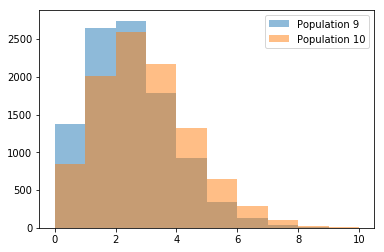

In [29]:
plt.hist(pop9, alpha= .5, label='Population 9', bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.hist(pop10, alpha= .5, label='Population 10', bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.legend(loc='upper right') 
plt.show()

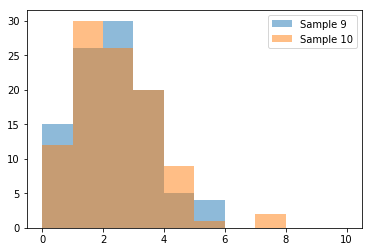

In [30]:
plt.hist(sample9, alpha= .5, label='Sample 9', bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.hist(sample10, alpha= .5, label='Sample 10', bins = [0,1,2,3,4,5,6,7,8,9,10]) 
plt.legend(loc='upper right') 
plt.show()

In [31]:
# Compute the difference between the two sample means.
diff5=sample10.mean( ) - sample9.mean()
print('The difference of the sample means is {}.'.format(diff5))

size5 = np.array([100, 100])
sd5 = np.array([sample9.std(), sample10.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se5 = (sum(sd5 ** 2 / size5)) ** 0.5 
print('The standard error of the difference in sampled means is {}.'.format(diff_se5))

#The difference between the means divided by the standard error: T-value.  
print('The T-value for the observed difference is {}.'.format(diff5/diff_se5))

The difference of the sample means is 0.10999999999999988.
The standard error of the difference in sampled means is 0.18786963565195944.
The T-value for the observed difference is 0.5855123933054405.


In [32]:
from scipy.stats import ttest_ind
print(ttest_ind(sample10, sample9, equal_var=False))

Ttest_indResult(statistic=0.5825774756091435, pvalue=0.5608463576650398)


Because a T-value this large could happen 56% of the time with equal populations, we do not have evidence these populations are different.  This was already evident with the significant overlap of the samples' histograms.